In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("housing.data")
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

    crim - per capita crime rate by town
    zn - proportion of residential land zoned for lots over 25,000 sq.ft
    indus - proportion of non-retail business acres per town
    chas - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    nox - nitric oxides concentration (parts per 10 million)
    rm - average number of rooms per dwelling
    age - proportion of owner-occupied units built prior to 1940
    dis - weighted distances to five Boston employment centres
    rad - index of accessibility to radial highways
    tax - full-value property-tax rate per USD 10,000
    ptratio- pupil-teacher ratio by town
    b 1000(B - 0.63)^2, where B is the proportion of blacks by town
    lstat - percentage of lower status of the population
    medv - median value of owner-occupied homes in USD 1000‚Äôs

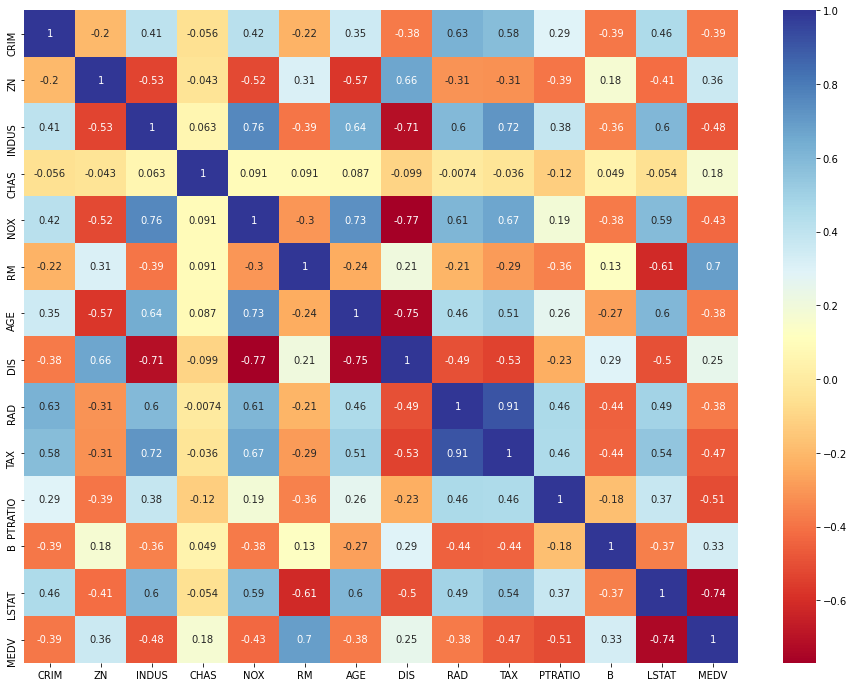

In [47]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
sns.heatmap(df.corr(),cmap='RdYlBu',annot=True);

    LSTAT - –ø—Ä–æ—Ü–µ–Ω—Ç –±–µ–¥–Ω—ã—Ö
    INDUS - –ø—Ä–æ—Ü–µ–Ω—Ç –∑–µ–º–µ–ª—å –∑–∞–Ω—è—Ç—ã—Ö –ø—Ä–µ–¥–ø—Ä–∏—è—Ç–∏—è–º–∏
    NOX - –∑–∞–≥—Ä—è–∑–Ω—ë–Ω–Ω–æ—Å—Ç—å –º–µ—Å—Ç–Ω–æ—Å—Ç–∏
    RM - —Å—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–Ω–∞—Ç –≤ –¥–æ–º–µ
    MEDV - –º–µ–¥–∏–∞–Ω–Ω–∞—è —Å—Ç–æ–∏–º–æ—Å—Ç—å —Ü–µ–Ω –Ω–∞ –¥–æ–º–∞ –∂–∏–ª—å—Ü–æ–≤  

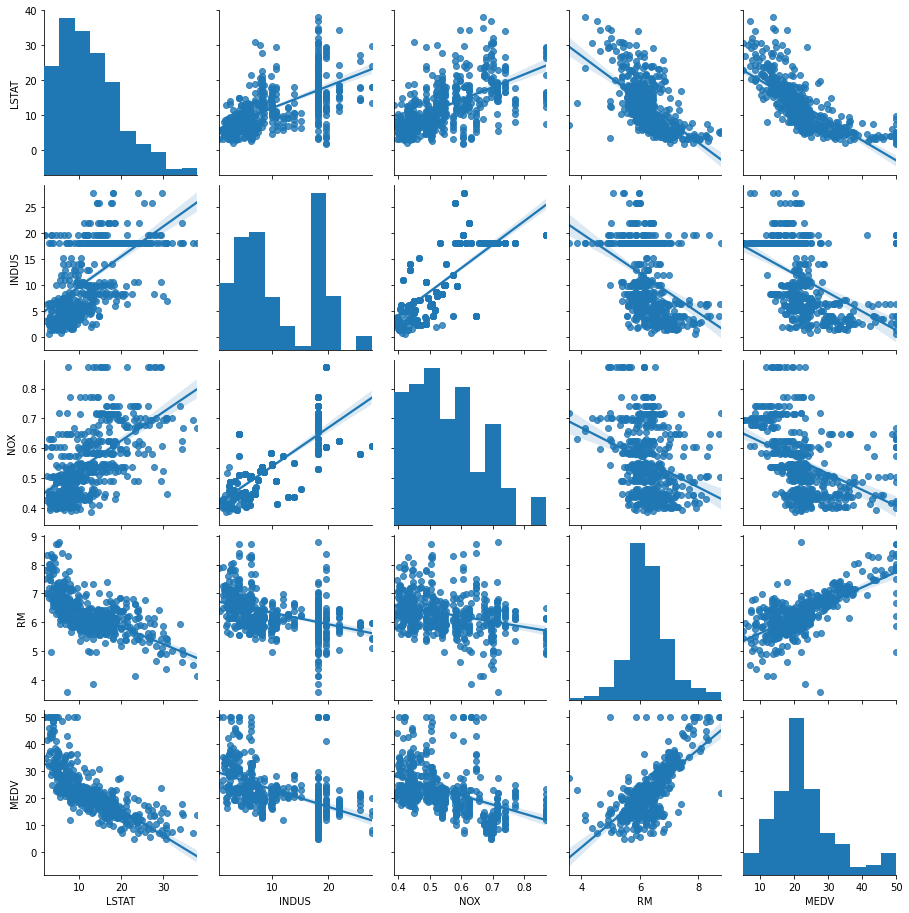

In [48]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], kind="reg");

- –ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç—Å—è –ª–∏–Ω–µ–π–Ω–∞—è –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å –º–µ–∂–¥—É –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –∫–≤–∞—Ä—Ç–∏—Ä **RM** –∏ —Ü–µ–Ω–∞–º–∏ –Ω–∞ –¥–æ–º–∞ **MEDV**
- –ü–µ—Ä–µ–º–µ–Ω–Ω—ã–µ **RM, MEDV** –∏–º–µ—é—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ


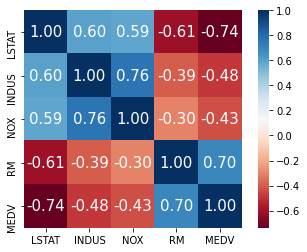

In [49]:
cm = np.corrcoef(df[cols].values.T)
sns.heatmap(cm,cmap='RdBu', cbar=True,
            annot=True,square=True,
            fmt='.2f',annot_kws={'size': 15},
            yticklabels=cols,xticklabels=cols);

### –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã—Ö —Ü–µ–ª–µ–≤—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞

In [50]:
class LinearRegressionGD(object):
    """
    eta (float)
         —Å–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è
    n_iter (int)
         –ø—Ä–æ—Ö–æ–¥—ã –ø–æ –æ–±—É—á–∞—é—â–∏–º—Å—è –Ω–∞–±–æ—Ä–∞–º –¥–∞–Ω–Ω—ã—Ö
    w_ (ld-array)
         –í–µ—Å–∞ –ø–æ—Å–ª–µ –ø—Ä–æ–≥–æ–Ω–∫–∏
    cost_ (list)
        —Å—É–º–º–∞ –∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω—ã—Ö –æ—à–∏–±–æ–∫, –ø–æ–∫–∞–∑—ã–≤–∞—é—â–∏–µ —É—Å–ø–µ—à–Ω–æ—Å—Ç—å –∞–ª–≥–æ—Ä–∏—Ç–º–∞
    """

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """
        X (matrix) –æ–±—É—á–∞—é—â–∏–µ –≤–µ–∫—Ç–æ—Ä—ã, shape = [–ø—Ä–∏–º–µ—Ä—ã, –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ]
        y (vector)  —Ü–µ–ª–µ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è (1|-1)
        :return self
        """

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)  # –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è —Ä–∞—Å—á–µ—Ç–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –æ—Ç –∏—Å—Ç–∏–Ω–Ω—ã—Ö –º–µ—Ç–æ–∫ –∫–ª–∞—Å—Å–æ–≤
            self.w_[1:] += self.eta * X.T @ errors  # –æ–±–Ω–æ–≤–ª—è–µ–º –≤–µ—Å–∞, –≤—ã—á–∏—Å–ª–∏–≤ –≥—Ä–∞–¥–∏–µ–Ω—Ç
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """  –≤—ã—á–∏—Å–ª—è–µ—Ç –æ–±—â–∏–π –≤—Ö–æ–¥ """
        return X @ self.w_[1:] + self.w_[0]


    def predict(self, X):
        """ –≤–æ–∑—Ä–∞—â–∞–µ—Ç –º–µ—Ç–∫—É –∫–ª–∞—Å—Å–∞ –ø–æ—Å–ª–µ –µ–¥–∏–Ω–∏—á–Ω–æ–≥–æ —à–∞–≥–∞"""
        return self.net_input(X)


In [51]:
from sklearn.preprocessing import StandardScaler
X = df[['RM']].values
y = df['MEDV'].values

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

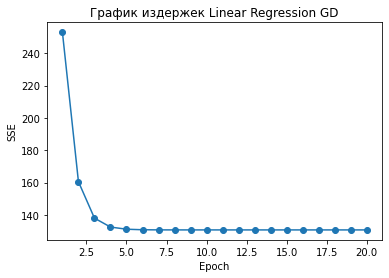

In [52]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

plt.plot(range(1, lr.n_iter+1), lr.cost_, marker='o')
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.title('–ì—Ä–∞—Ñ–∏–∫ –∏–∑–¥–µ—Ä–∂–µ–∫ Linear Regression GD');

In [53]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    

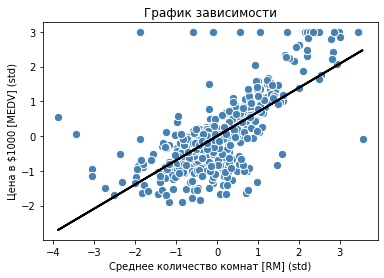

In [54]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('–°—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–Ω–∞—Ç [RM] (std)')
plt.ylabel('–¶–µ–Ω–∞ –≤ $1000 [MEDV] (std)')
plt.title('–ì—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏');

In [55]:
num_rooms_std = sc_x.transform(np.array([[6]]))
price_std = lr.predict(num_rooms_std)
price = sc_y.inverse_transform(price_std)*1000
print("–¶–µ–Ω–∞ –Ω–∞ 6-—ç—Ç–∞–∂—ã–π –¥–æ–º ~%.0f$"% price)

–¶–µ–Ω–∞ –Ω–∞ 6-—ç—Ç–∞–∂—ã–π –¥–æ–º ~19942$


### –û—Ü–µ–Ω–∫–∞ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ —Å –ø–æ–º–æ—â—å—é scikit-learn

In [56]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

print('ùë¶ÃÇ = ùëñùëõùë°ùëíùëüùëêùëíùëùùë°+ùë†ùëôùëúùëùùëí*x')
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

ùë¶ÃÇ = ùëñùëõùë°ùëíùëüùëêùëíùëùùë°+ùë†ùëôùëúùëùùëí*x
Slope: 9.102
Intercept: -34.671


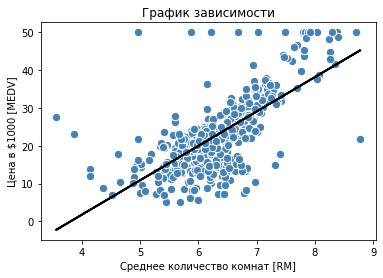

In [57]:
lin_regplot(X, y, slr)
plt.xlabel('–°—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–Ω–∞—Ç [RM]')
plt.ylabel('–¶–µ–Ω–∞ –≤ $1000 [MEDV]')
plt.title('–ì—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏');

### –ü–æ–¥–≥–æ–Ω–∫–∞ –Ω–∞–¥–µ–∂–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º RANSAC
—Å–æ–≥–ª–∞—Å–∏–µ –Ω–∞ –æ—Å–Ω–æ–≤–µ —Å–ª—É—á–∞–π–Ω—ã—Ö –≤—ã–±–æ—Ä–æ–∫ ***(Random Sample Consensum)***
<br>**–ò–¥–µ—è:** –ø–æ–¥–æ–≥–Ω–∞—Ç—å –º–æ–¥–µ–ª—å –∫ –ø–æ–¥–Ω–∞–±–æ—Ä—É –¥–∞–Ω–Ω—ã—Ö (**–Ω–µ-–≤—ã–±—Ä–æ—Å–∞–º**) 
>**–ê–ª–≥–æ—Ä–∏—Ç–º:**
1. –°–ª—É—á–∞–π–Ω–æ –≤—ã–±—Ä–∞—Ç—å –æ–±—Ä–∞–∑—Ü—ã, –∫–æ—Ç–æ—Ä—ã–µ **–Ω–µ-–≤—ã–±—Ä–æ—Å—ã**, –æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å 
2. –ü—Ä–æ–≤–µ—Ä–∏—Ç—å –≤—Å–µ –æ–±—Ä–∞–∑—Ü—ã –Ω–∞ –º–æ–¥–µ–ª–∏ –∏ –ø–æ—Ç–æ–º –¥–æ–±–∞–≤–∏—Ç—å –æ—Å—Ç–∞–≤—à–∏–µ—Å—è –æ–±—Ä–∞–∑—Ü—ã (**–Ω–µ-–≤—ã–±—Ä–æ—Å—ã**)
3. –ü–æ–≤—Ç–æ—Ä–Ω–æ –æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å –Ω–∞ –Ω–µ-–≤—ã–±—Ä–æ—Å–∞—Ö –∏ –æ—Ü–µ–Ω–∏—Ç—å SSE.

In [58]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_loss',   # –∞–±—Å–æ–ª—é—Ç–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –ø–æ –≤–µ—Ä—Ç–∏–∫–∞–ª–∏
                         residual_threshold= 5,  # —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ –ø—Ä—è–º–æ–π, –æ—Ç—Å–µ–∫–∞—é—â–µ–µ –≤—ã–±—Ä–æ—Å—ã 
                         random_state=0)
ransac.fit(X, y);

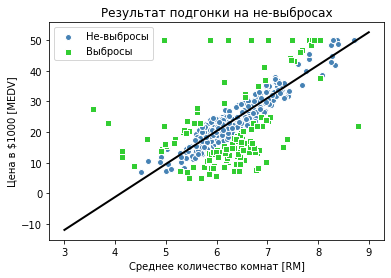

In [59]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='–ù–µ-–≤—ã–±—Ä–æ—Å—ã')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='–í—ã–±—Ä–æ—Å—ã')

plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('–°—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–Ω–∞—Ç [RM]')
plt.ylabel('–¶–µ–Ω–∞ –≤ $1000 [MEDV]')
plt.title('–†–µ–∑—É–ª—å—Ç–∞—Ç –ø–æ–¥–≥–æ–Ω–∫–∏ –Ω–∞ –Ω–µ-–≤—ã–±—Ä–æ—Å–∞—Ö');
plt.legend(loc='upper left');

### –û—Ü–µ–Ω–∫–∞ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–µ–π –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏

In [60]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [61]:
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

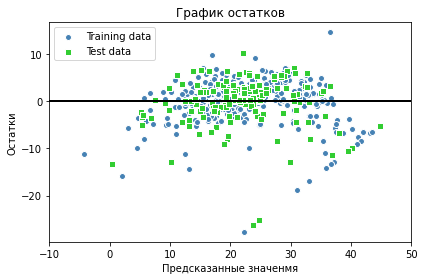

In [62]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')

plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–º—è')
plt.ylabel('–û—Å—Ç–∞—Ç–∫–∏')
plt.title('–ì—Ä–∞—Ñ–∏–∫ –æ—Å—Ç–∞—Ç–∫–æ–≤')
plt.legend(loc='best')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

### - Mean SSE [MSE]
* –Ω–æ—Ä–º–∞–ª–∏–∑—É–µ—Ç SSE –ø–æ —Ä–∞–∑–º–µ—Ä—É –≤—ã–±–æ—Ä–∫–∏

In [63]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196
R^2 train: 0.765, test: 0.673


**–í—ã–≤–æ–¥:** —Å–º–æ—Ç—Ä–∏–º –Ω–∞ MSE -: –º–æ–¥–µ–ª—å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∞

# –†–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–æ–Ω–Ω—ã–µ –º–µ—Ç–æ–¥—ã –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏

## –ì—Ä–µ–±–Ω–µ–≤–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è *Ridge Regression*
-—à—Ç—Ä–∞—Ñ—É–µ–º–∞—è –º–µ—Ç–æ–¥–æ–º **L2** –º–æ–¥–µ–ª—å

In [64]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

## *LASSO*
—Ä–µ–≥—Ä–µ—Å—Å–∏—è –º–µ—Ç–æ–¥–æ–º –∞–±—Å–æ–ª—é—Ç–Ω–æ–≥–æ —Å–æ–∫—Ä–∞—â–µ–Ω–∏—è –∏ –≤—ã–±–æ—Ä–∞
<br>*Least Absolute Shrinkage and Selection Operator*

-—à—Ç—Ä–∞—Ñ—É–µ–º–∞—è –º–µ—Ç–æ–¥–æ–º **L1** –º–æ–¥–µ–ª—å

In [65]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

<img src='https://user-images.githubusercontent.com/54672403/82748979-c862a600-9dae-11ea-8960-202a5e47df83.png' width='500'>
<img src='https://user-images.githubusercontent.com/54672403/82749025-0f509b80-9daf-11ea-82b2-6ade494c5cb2.png' width='500'>

In [66]:
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5) # —á–µ—Ä–µ–∑ l1_ratio –º–æ–∂–Ω–æ —Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞—Ç—å —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ L1 –∫ L2

# –ö—Ä–∏–≤–æ–ª–∏–Ω–µ–π–Ω–æ-–ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è
${\displaystyle y=w _{0}+w _{1}x+w _{2}x^{2}+w _{3}x^{3}+\cdots +w _{n}x^{n}}$
<br>n - —Å—Ç–µ—Ä–µ–Ω—å –ø–æ–ª–∏–Ω–æ–º–∞

In [67]:
from sklearn.preprocessing import PolynomialFeatures
X = np.array([258, 270, 294, 
              320, 342, 368, 
              396, 446, 480, 586])[:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368, 391.2, 390.8])

lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2) # –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–æ–≥–æ —á–ª–µ–Ω–∞ 2-—Å—Ç–µ–ø–µ–Ω–∏
X_quad = quadratic.fit_transform(X)

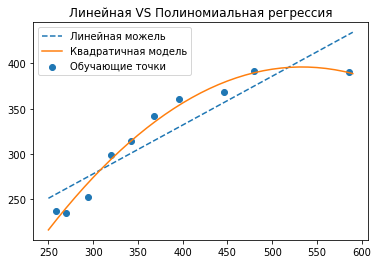

In [68]:
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

plt.scatter(X, y, label='–û–±—É—á–∞—é—â–∏–µ —Ç–æ—á–∫–∏')
plt.plot(X_fit, y_lin_fit, label='–õ–∏–Ω–µ–π–Ω–∞—è –º–æ–∂–µ–ª—å', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='–ö–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –º–æ–¥–µ–ª—å')
plt.legend(loc='best')
plt.title('–õ–∏–Ω–µ–π–Ω–∞—è VS –ü–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è');

In [69]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
print('Training MSE linear: %.3f,\t quadratic: %.3f' % (
        mean_squared_error(y, y_lin_pred),
        mean_squared_error(y, y_quad_pred)))
print('Training R^2 linear: %.3f,\t quadratic: %.3f' % (
        r2_score(y, y_lin_pred),
        r2_score(y, y_quad_pred)))

Training MSE linear: 569.780,	 quadratic: 61.330
Training R^2 linear: 0.832,	 quadratic: 0.982


## –ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–µ–ª–∏–Ω–µ–π–Ω—ã—Ö –≤–∑–∞–∏–º–æ—Å–≤—è–∑–µ–π
    LSTAT - –ø—Ä–æ—Ü–µ–Ω—Ç –±–µ–¥–Ω—ã—Ö
    MEDV - —Ü–µ–Ω—ã –Ω–∞ –¥–æ–º

In [70]:
X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

In [71]:
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

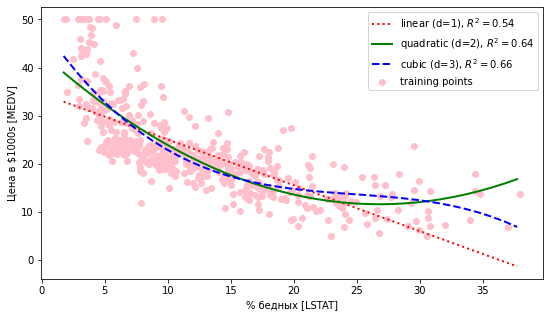

In [72]:
plt.figure(figsize=(9,5))
plt.scatter(X, y, label='training points', color='pink')

plt.plot(X_fit, y_lin_fit, 
         label=f'linear (d=1), $R^2={linear_r2:.2}$',
         color='red', lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label=f'quadratic (d=2), $R^2={quadratic_r2:.2}$',
         color='green', lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label=f'cubic (d=3), $R^2={cubic_r2:.2}$',
         color='blue', lw=2, 
         linestyle='--')

plt.xlabel('% –±–µ–¥–Ω—ã—Ö [LSTAT]')
plt.ylabel('–¶–µ–Ω–∞ –≤ $1000s [MEDV]')
plt.legend(loc='best');

In [73]:
import plotly.graph_objects as go
# plotly figure setup
fig=go.Figure()
fig.add_trace(go.Scatter(x=X.flatten(), y=y, mode='markers', marker_color='pink'))
fig.add_trace(go.Scatter(x=X_fit.flatten(), y=y_lin_fit.flatten(),
                        name=f'$linear (d=1), R^2={linear_r2:.2}$', mode='lines'))

fig.add_trace(go.Scatter(x=X_fit.flatten(), y=y_quad_fit.flatten(),
                        name=f'$quadratic (d=2), R^2={quadratic_r2:.2}$', mode='lines'))

fig.add_trace(go.Scatter(x=X_fit.flatten(), y=y_cubic_fit.flatten(),
                        name=f'$cubic (d=3), R^2={cubic_r2:.2}$', mode='lines'))

# plotly figure layout
fig.update_layout(xaxis_title = '% –±–µ–¥–Ω—ã—Ö [LSTAT]', yaxis_title = '–¶–µ–Ω–∞ –≤ $1000 [MEDV]')

> - –°–≤—è–∑—å –º–µ–∂–¥—É 2 –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏ –ø–æ—Ö–æ–∂–∞ –Ω–∞ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω—É—é —Ñ—É–Ω–∫—Ü–∏—é 
$ f(x)=2^{-x}$
> - –ª–æ–≥–æ—Ä–∏—Ñ–º —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ - –ª–∏–Ω–∏—è 
$ \log{f(x)}= -x$


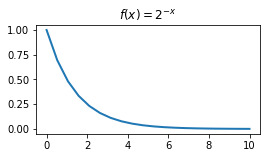

In [74]:
import numpy as np
plt.figure(figsize=(4,2))
x = np.linspace(0, 10, 20)
plt.plot(x, np.exp2(-x), lw=2,);
plt.title('$ f(x)=2^{-x}$');

In [75]:
# —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# –æ–±—É—á–µ–Ω–∏–µ
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

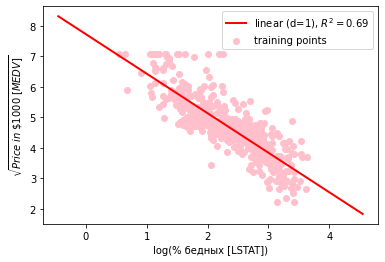

In [76]:
plt.scatter(X_log, y_sqrt, label='training points', color='pink')

plt.plot(X_fit, y_lin_fit, 
         label=f'linear (d=1), $R^2={linear_r2:.2}$',
         color='red', lw=2)

plt.xlabel('log(% –±–µ–¥–Ω—ã—Ö [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000 \; [MEDV]}$')
plt.legend(loc='best');

# –†–µ–≥—Ä–µ—Å—Å–∏—è –Ω–∞ –æ—Å–Ω–æ–≤–µ –¥–µ—Ä–µ–≤–∞ –ø—Ä–∏–Ω—è—Ç–∏–π —Ä–µ—à–µ–Ω–∏–π
- –∫—Ä–∏—Ç–µ—Ä–∏–π —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è **MSE** - –ø–æ–Ω–∏–∂–µ–Ω–∏–µ –¥–∏—Å–ø–µ—Ä—Å–∏–∏

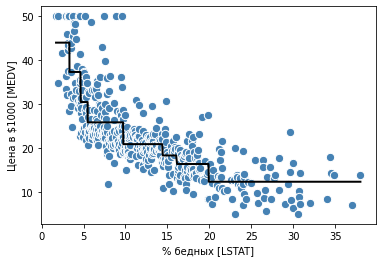

In [77]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% –±–µ–¥–Ω—ã—Ö [LSTAT]')
plt.ylabel('–¶–µ–Ω–∞ –≤ $1000 [MEDV]');

# –†–µ–≥—Ä–µ—Å—Å–∏—è –Ω–∞ –æ—Å–Ω–æ–≤–µ —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞

In [78]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [85]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, criterion='mse', 
                               random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.2f\t test: %.2f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f\t test: %.2f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 2.15	 test: 10.62
R^2 train: 0.98	 test: 0.86


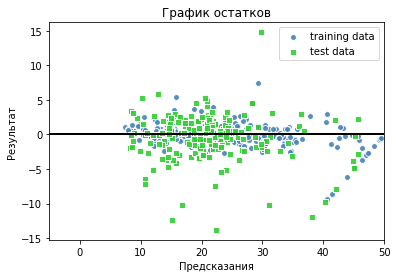

In [94]:
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue', edgecolor='white',
            marker='o', s=35, alpha=0.9, 
            label='training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='limegreen', edgecolor='white',
            marker='s', s=35, alpha=0.9,
            label='test data')

plt.hlines(y=0, xmin=-5, xmax=50, lw=2, color='black')
plt.xlim([-5, 50])


plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è')
plt.ylabel('–†–µ–∑—É–ª—å—Ç–∞—Ç')
plt.legend(loc='best')
plt.title('–ì—Ä–∞—Ñ–∏–∫ –æ—Å—Ç–∞—Ç–∫–æ–≤');